# Central London Data Science Project Nights
### Optimising training data for urban wind predictions
The focus of this meetup is in finding out different ways in which training data can be structure in order to improve a models accuracy.


### The data
The data supplied is sythetically generated urban wind data from 3 streets. The csv is structure as follows:

street 1 wind speed (m/s), street 1 wind direction (degrees), street 2 wind speed (m/s), street 2 wind direction (degrees), street 3 wind speed (m/s), street 3 wind direction (degrees)

The predicted value is the wind direction of the 3rd street

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import copy
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

### Load csv data
street1 wind speed, street1 wind direction,street2 wind speed, street2 wind direction,street3 wind speed, street3 wind direction,

In [20]:
f = open("wind.csv")
data = np.loadtxt(f,delimiter=',')
# show first row of data
data[:2,3],data.shape

(array([ 46.155,  54.67 ]), (2000, 6))

# Transform the input data function (the fun bit)

In [21]:
def transformInputData(inputData):
    l_input = copy.deepcopy(inputData)
    # this is where you put explore different ways the data can be structured
    l_input[:,0] = np.sin(np.deg2rad(l_input[:,1]))
    l_input[:,1] = np.cos(np.deg2rad(l_input[:,1]))
    l_input[:,2] = np.sin(np.deg2rad(l_input[:,3]))
    l_input[:,3] = np.cos(np.deg2rad(l_input[:,3]))
    # feel free to write one for the output data if needed
    poly = PolynomialFeatures(2)
    l_input= poly.fit_transform(l_input)
    return l_input

In [22]:
def transformOutputDataCos(inputData):
    
    return np.cos(np.deg2rad(inputData))

In [23]:
def transformOutputDataSin(inputData):
    
    return np.sin(np.deg2rad(inputData))

### Split data into training and test data

In [24]:
# use first 4 columns as the input data to a our model
x_data = transformInputData(data[:,:4])

# use first 1500 rows as training input data
x_train = x_data[:1500]

# use the remaining 500 rows as test input data
x_test = x_data[1500:]

# show first 3 rows of training input data
x_train[:3]

array([[ 1.        ,  0.80812355, -0.58901302,  0.7212164 ,  0.69270983,
         0.65306367, -0.47599529,  0.58283195,  0.55979512,  0.34693633,
        -0.42480584, -0.40801511,  0.52015309,  0.49959369,  0.47984691],
       [ 1.        , -0.27572124,  0.96123764,  0.81583491,  0.57828487,
         0.0760222 , -0.26503363, -0.22494301, -0.15944542,  0.9239778 ,
         0.78421122,  0.55586919,  0.6655866 ,  0.47178499,  0.3344134 ],
       [ 1.        ,  0.77601338, -0.63071644,  0.92500428,  0.37995669,
         0.60219677, -0.4894444 ,  0.7178157 ,  0.29485148,  0.39780323,
        -0.58341541, -0.23964493,  0.85563291,  0.35146156,  0.14436709]])

In [25]:
# use 5th column as the ouput data to a our model
y_data_cos = transformOutputDataCos(data[:,5])

# use first 1500 rows as training ouput data
y_train_cos = y_data_cos[:1500]

# use the remaining 500 rows as test output data
y_test_cos = y_data_cos[1500:]

# show first 3 values of the training output data
y_train_cos[:3]

array([-0.42696334,  0.88610653, -0.80059544])

In [26]:
# use 5th column as the ouput data to a our model
y_data_sin = transformOutputDataSin(data[:,5])

# use first 1500 rows as training ouput data
y_train_sin = y_data_sin[:1500]

# use the remaining 500 rows as test output data
y_test_sin = y_data_sin[1500:]

# show first 3 values of the training output data
y_train_sin[:3]

array([ 0.90426893, -0.46348163,  0.59920526])

### Train model

In [27]:
regr_cos = linear_model.LinearRegression()
regr_cos.fit(x_train, y_train_cos)
print('Coefficients: \n', regr_cos.coef_)
print("Mean squared error: %.2f"% np.mean((regr_cos.predict(x_test) - y_test_cos) ** 2))

Coefficients: 
 [ 0.          0.14103603  1.09233276 -0.22509345  0.27706426 -0.01919335
  0.11263822 -0.14345951  0.04243563  0.01919335 -0.10744799 -0.0130007
 -0.01692696 -0.04008433  0.01692696]
Mean squared error: 0.08


In [28]:
regr_sin = linear_model.LinearRegression()
regr_sin.fit(x_train, y_train_sin)
print('Coefficients: \n', regr_sin.coef_)
print("Mean squared error: %.2f"% np.mean((regr_sin.predict(x_test) - y_test_sin) ** 2))

Coefficients: 
 [ 0.          0.39383573 -0.51958009 -0.06341226  0.18685443 -0.01487547
 -0.06711079  0.05787682 -0.02068715  0.01487547  0.03673878  0.0059503
  0.00866489 -0.00542091 -0.00866489]
Mean squared error: 0.05


### Plot predictions

In [29]:
data[:1,1]

array([ 126.087])

### Predict cos

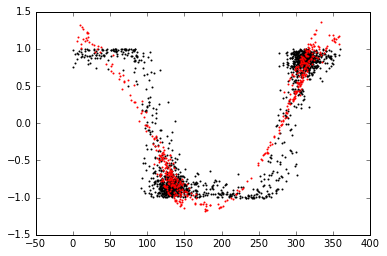

In [30]:
plt.figure(0)
plt.scatter(data[:1500,1], y_train_cos,  color='black', s=1)
plt.scatter(data[1500:,1], regr_cos.predict(x_test),  color='red', s=1)
plt.show()

### Predict sin

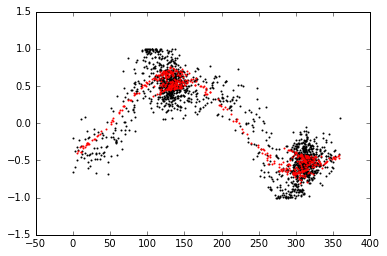

In [31]:
plt.figure(1)
plt.scatter(data[:1500,1], y_train_sin,  color='black', s=1)
plt.scatter(data[1500:,1], regr_sin.predict(x_test),  color='red', s=1)
plt.show()

In [32]:
data[:1500,1]

array([ 126.087,  343.995,  129.103, ...,  125.694,  119.548,  321.889])

### Use atan2 to merge sin and cos predictions

In [39]:
real = np.arctan2( regr_sin.predict(x_test),regr_cos.predict(x_test)) * 180 / np.pi

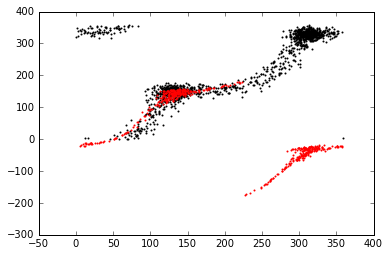

In [44]:
plt.figure(2)
plt.scatter(data[:1500,1],data[:1500,5],  color='black', s=1)
plt.scatter(data[1500:,1], real,  color='red', s=1)
plt.show()

### Use modulo to change loop values from 0 to 360

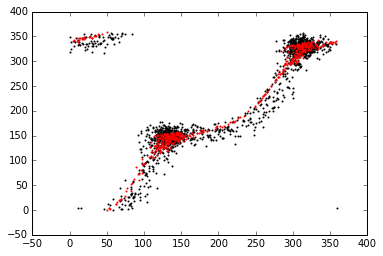

In [45]:
plt.figure(2)
plt.scatter(data[:1500,1],data[:1500,5],  color='black', s=1)
plt.scatter(data[1500:,1], np.mod(real,360),  color='red', s=1)
plt.show()